# Flower Recognition

Bu projemizde çiçekleri sınıflanıdrma modeli oluşturacağız.

<img src="https://www.ilav.org/wp-content/uploads/2022/12/lale-gorsel-8.jpg">

<a href="https://thecleverprogrammer.com/2020/11/24/flower-recognition-with-python/">Dataya Buradan Erişebilirsiniz</a>

In [4]:
import cv2
import pandas as pd
import os

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [6]:
os.listdir("flowers")

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [15]:
# ['papatya', 'karahindiba', 'gül', 'ayçiçeği', 'lale']

In [8]:
img_path="flowers/"
labels=os.listdir("flowers")

In [9]:
#Dosyadan Resim okuma
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):       #Klasörün içindeki alt klasörleri söyler
        img_list.append(img_path+label+"/"+img_file)  #apppend dizinin sonuna eklme yapıyor
        label_list.append(label)

In [10]:
df=pd.DataFrame({"img":img_list,"label":label_list})

In [11]:
df.sample(3)

,img,label
3969,flowers/tulip/4582198748_20fa7caaa1.jpg,tulip
3725,flowers/tulip/17994129033_bbd0acba62_n.jpg,tulip
1016,flowers/dandelion/18271576032_d7e2296de4_n.jpg,dandelion


In [12]:
df.shape

(4317, 2)

In [13]:
d={'daisy':0,
 'dandelion':1,
 'rose':2,
 'sunflower':3,
 'tulip':4}

In [14]:
df["encode_label"]=df["label"].map(d)

In [16]:
x=[]
for img in df["img"]:
    img=cv2.imread(img)
    img=cv2.resize(img,(128,128))
    img=img/255
    x.append(img)

In [17]:
x=np.array(x)

In [18]:
y=df["encode_label"]

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [50]:
model=Sequential()
model.add(Input(shape=(128,128,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25)) # Burada 'rate' parametresini belirtiyoruz
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128))
model.add(Dense(5, activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,verbose=1)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - accuracy: 0.4019 - loss: 19.7715 - val_accuracy: 0.2581 - val_loss: 20.4381
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 160ms/step - accuracy: 0.6444 - loss: 4.3379 - val_accuracy: 0.2188 - val_loss: 13.2850
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 158ms/step - accuracy: 0.7753 - loss: 1.4373 - val_accuracy: 0.2731 - val_loss: 12.4706
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 158ms/step - accuracy: 0.8690 - loss: 0.5290 - val_accuracy: 0.3727 - val_loss: 6.1427
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.8921 - loss: 0.3577 - val_accuracy: 0.3843 - val_loss: 5.0746
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 158ms/step - accuracy: 0.9230 - loss: 0.2250 - val_accuracy: 0.5104 - val_loss: 2.8096
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.9459 - loss: 0.1571 - val_accuracy: 0.4988 - val_loss: 2.9749
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.9463 - los

In [48]:
# EarlyStopping callback'i oluşturma
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1, 
#                               min_delta=0.01)

# Modeli eğitme
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
#          batch_size=32, callbacks=[early_stopping])

# --> Bu kod Accuracy score en yüksek halini alınca eğitimi durduruyor

In [47]:
def yb(img):
    img=cv2.imread(img)
    img=cv2.resize(img,(128,128))
    img=img/255
    img=np.expand_dims(img,axis=0)  # Modelin boyutunu arttırıyor
    return img

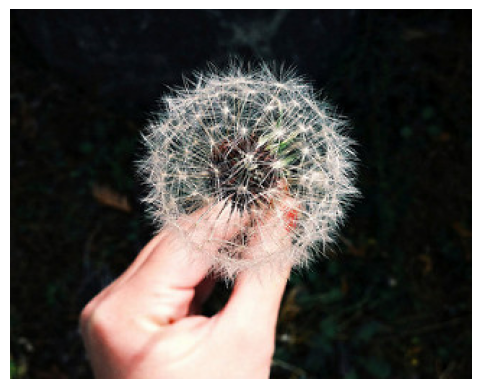

In [36]:
image_path = "flowers/dandelion/18271576032_d7e2296de4_n.jpg"  # Görüntü dosyasının yolu
img = cv2.imread(image_path)  # Görüntüyü yükleme
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında yükler; RGB'ye dönüştürelim
plt.imshow(img)# Görüntüyü gösterme
plt.axis('off')  # Eksenleri gizleme
plt.show()

In [37]:
image=yb("flowers/dandelion/18271576032_d7e2296de4_n.jpg")

In [38]:
prediction=model.predict(image)
predicted_class=np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [39]:
predicted_class

1

In [40]:
#{'daisy':0,
# 'dandelion':1,
# 'rose':2,
# 'sunflower':3,
# 'tulip':4}

In [41]:
model.save("flow.h5")

### Transfer Learning ile (VGG16)

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50,Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Tek satırda resimlerin tamamını okumaya yarıyor

In [52]:
data_dir="flowers"
img_width,img_height=224, 224

train_datagen=ImageDataGenerator(rescale=1/255, validation_split=0.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="sparse", subset="training")

test_datagen=ImageDataGenerator( rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="sparse", subset="validation")

base_model=VGG16(weights="imagenet", input_shape=(img_width,img_height,3),include_top=False)
model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation="relu")) # Dense nöronları birbirine bağlar
model.add(Dense(5,activation="softmax"))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.
Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.5746 - loss: 2.6070 - val_accuracy: 0.7919 - val_loss: 0.7138
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.9033 - loss: 0.2914 - val_accuracy: 0.8023 - val_loss: 0.5632
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.9528 - loss: 0.1331 - val_accuracy: 0.8023 - val_loss: 0.6675
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.9744 - loss: 0.0875 - val_accuracy: 0.8012 - val_loss: 0.7099
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.9950 - loss: 0.0342 - val_accuracy: 0.8174 - val_loss: 0.6675
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.9920 - loss: 0.0364 - val_accuracy: 0.7837 - val_loss: 0.8183
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9951 - loss: 0.0256 - val_accuracy: 0.8128 - val_loss: 0.7210
Epoch 8/10
109

In [44]:
model.save("flow_2.h5")

In [45]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │     102,761,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 331,887,505 (1.24 GB)

 Trainable params: 102,766,597 (392.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 205,533,196 (784.05 MB)

Sonuc olarak modelimizi hem CNN hem de Transfer Learning kullanarak eğittik. Sonuclarımız CNN:97% VGG16:99% Accuracy.Ayrıca modelimizi Streamlit uygulaması yapmak üzere kaydettik.